# Would Donald Trump Have Won The 2020 US Election If The Electoral System Leans More Towards Popular Votes?

## Introductory

The Electoral College system has been a concrete part of the US presidential election since the founding of the country. In this system, the citizens of each state cast their votes for their choice of electors, who will cast their votes for the presidential candidates. The number of electors of each state is the sum of the number of Senates and the number of Representatives. The Electoral College consists of 538 electors in total, and each elector's vote is counted as 1 vote in the general election. In the end, the candidate who wins over the majority - which means 270 votes - wins the election. The system was created out of good intention to balance the power of small states and large states, however, criticism is getting louder after several instances in which the winner of the popular vote did not win the election due to the outcome of the Electoral College vote. This has led to questions about whether the system accurately represents the will of the US citizens and if there might be a better way to elect the President.

In this research paper, we will explore what might have happened if a different electoral system had been in place in the 2020 election, specifically, one in which the candidate who won the majority of votes in each county - the sub-level administrative and electoral area of a state - would take all the votes in that county. The system has no intermediaries such as the electors, the citizens will directly vote for the presidential candidates, and each citizen's vote is precisely counted. This system assumes that the candidate who wins the most votes nationwide would win the election, as opposed to the current system, which gives power to individual states. With the county being the core electoral level instead of the state, the result of the voting will be more likely to accurately reflect the will comes from the root. The goal of this paper is to determine if this alternate electoral system would have resulted in a different outcome in the 2020 election, specifically, if Donald Trump would have won the election.

### Variables
Function f: Electoral Strategy
1. State-level
1.1 each state has same number of votes as its voters, votes based on which party won the majority of counties
1.2  each state has one vote, votes based on which party won the majority of counties

2. County-level
2.1 each county has same number of votes as its voters, cast all of its votes based on which party won the majority of votes
2.2 each county has one vote, cast its vote on the party won the majority


Variable X1: Area

Variable X2: Party

Variable X3: Raw Votes

Variable Y1: Fabricated Votes of One Area of One Party
Y1 = f(X1, X2, X3), where f could be f_1.1, f_1.2, f_2.1, f_2.2

Variable Y2: Donald Trump winning election or not
True if won, False if lost.

Votes obtained by Party in one Area

(Area, Party, Votes): The votes that the party obtained against the strategies within one geographical area, could be at the state level or at the county level.

### Outcome
Donald Trump winning election or not: True if won, False if lost.

## Data Cleaning/Loading

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [17]:
df = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/president_county_candidate.csv')
df_pc = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/president_county.csv')
df_geo = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/uscities.csv')
pd.set_option('display.max_columns', None)
df['county'] = df['county'].str.replace(' County', '')
df.drop(df[df['won'] == False].index, inplace = True)
df_geo.drop(['city', 'city_ascii', 'state_id', 'county_fips', 'source', 'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id'], axis = 1, inplace = True)
df_geo.rename(columns={"state_name": "state", "county_name": "county"}, inplace = True)
df_geo.drop_duplicates(
  subset = ['state', 'county'],
  keep = 'first', inplace = True)
df20 = pd.merge(df, df_geo, on=['county', 'state'], how = 'left')

df20['total_votes'] = df_pc['current_votes']
df20.head(10)

,state,county,candidate,party,total_votes,won,lat,lng,population,density
0,Delaware,Kent,Joe Biden,DEM,87025,True,39.1610,-75.5202,125931.0,617.0
1,Delaware,New Castle,Joe Biden,DEM,287633,True,39.7415,-75.5416,70655.0,2503.0
2,Delaware,Sussex,Donald Trump,REP,129352,True,38.9091,-75.4227,11463.0,449.0
3,District of Columbia,Ward 1,Joe Biden,DEM,41681,True,38.9072,-77.0369,82404.0,12910.0
4,District of Columbia,Ward 2,Joe Biden,DEM,32881,True,38.9063,-77.0340,76492.0,4624.0
5,District of Columbia,Ward 3,Joe Biden,DEM,44231,True,38.9884,-77.0900,82450.0,3059.0
6,District of Columbia,Ward 4,Joe Biden,DEM,45296,True,38.9310,-77.0380,86085.0,3740.0
7,District of Columbia,Ward 5,Joe Biden,DEM,46107,True,38.9717,-77.0089,88948.0,3369.0
8,District of Columbia,Ward 6,Joe Biden,DEM,62918,True,38.8869,-76.9896,102233.0,6893.0
9,District of Columbia,Ward 7,Joe Biden,DEM,38384,True,38.8582,-76.9478,81270.0,3734.0


In [ ]:
#df20['ln_total_votes'] = np.log10(df20['total_votes'])

In [ ]:
df20.to_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/data2.csv')

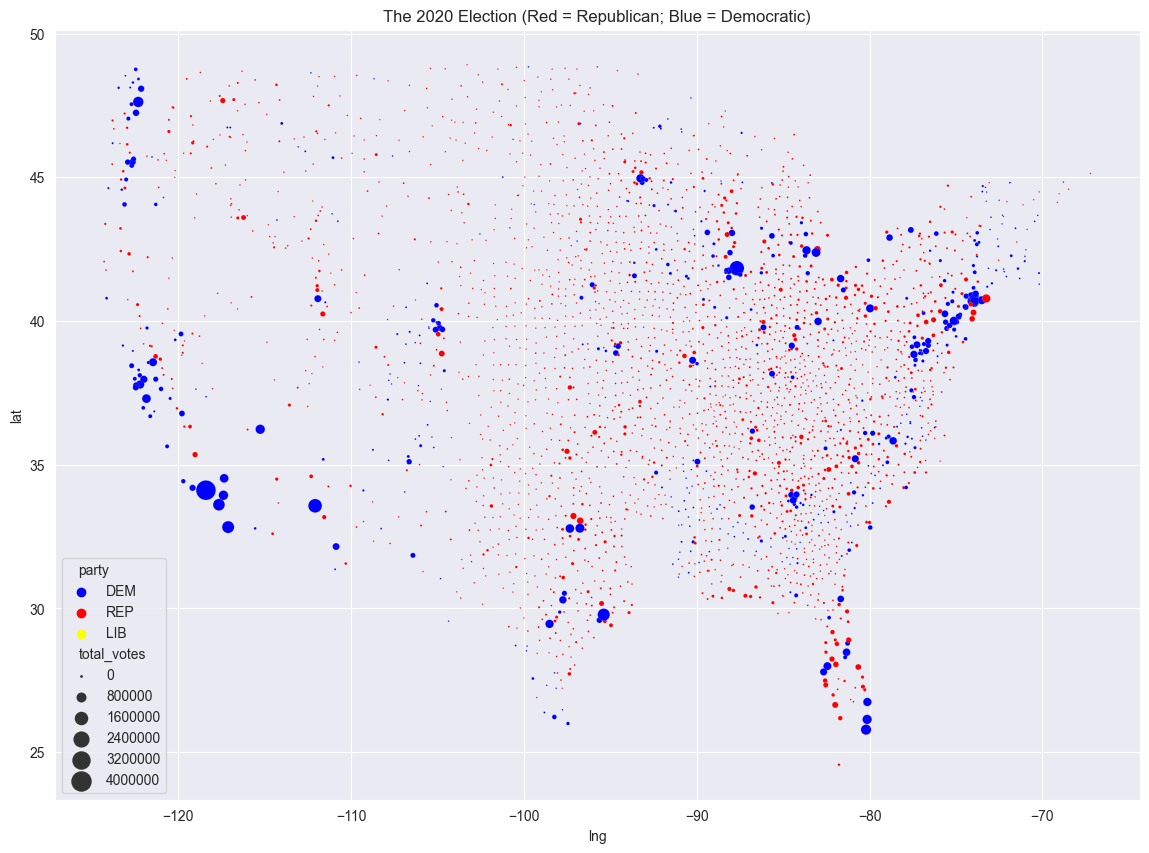

In [21]:
df_mainland = df20[~df20["state"].isin(["Alaska", "Hawaii"])]

plt.figure(figsize = (14,10))
sns.scatterplot(data = df_mainland, x = "lng", y = "lat", hue = "party", size = "total_votes",
                sizes = (2, 200), palette = ['blue','red','yellow'])
plt.title("The 2020 Election (Red = Republican; Blue = Democratic)");

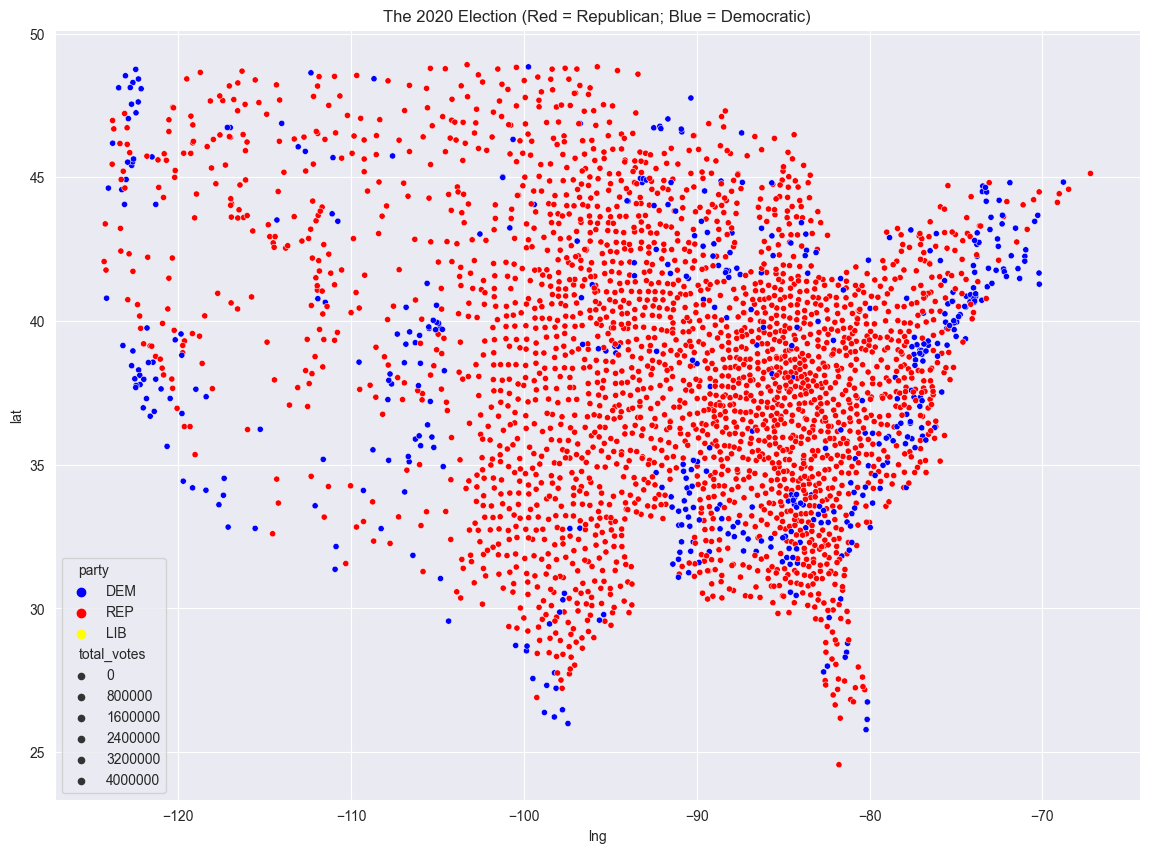

In [20]:
df_mainland = df20[~df20["state"].isin(["Alaska", "Hawaii"])]

plt.figure(figsize = (14,10))
sns.scatterplot(data = df_mainland, x = "lng", y = "lat", hue = "party", size = "total_votes",
                sizes = (20, 20), palette = ['blue','red','yellow'])
plt.title("The 2020 Election (Red = Republican; Blue = Democratic)");


State-level
1. each state has same number of votes as its voters, votes based on which party won the majority of counties
2. each state has one vote, votes based on which party won the majority of counties

County-level
1. each county has same number of votes as its voters, cast all of its votes based on which party won the majority of votes
2. each county has one vote, cast its vote on the party won the majority

Original voting
